# Install Libraries

In [1]:
!pip3 install -U pip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 6.2 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 22.1.2
    Uninstalling pip-22.1.2:
      Successfully uninstalled pip-22.1.2


In [2]:
!pip3 install -U matplotlib

# Import Libraries

In [3]:
import pandas as pd
import numpy as np
import os

In [4]:
import matplotlib.pyplot as plt

In [5]:
%matplotlib inline
import seaborn as sns
sns.set_theme(style="whitegrid")

In [6]:
from itertools import cycle
color_pal=plt.rcParams['axes.prop_cycle'].by_key()['color']
color_cycle=cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])

In [7]:
plt.rcParams["figure.figsize"] = (15,9)

In [8]:
CALENDAR_PATH = os.path.abspath('../input/m5-forecasting-accuracy/calendar.csv')
SELL_PRICE_PATH = os.path.abspath('../input/m5-forecasting-accuracy/sell_prices.csv')
SALES_TV_PATH = os.path.abspath('../input/m5-forecasting-accuracy/sales_train_validation.csv')

In [9]:
df_calendar = pd.read_csv(CALENDAR_PATH)
df_calendar.head()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1


In [10]:
# drop wday, event_type_2, event_name_2, 
df_calendar.drop(['wday', 'event_name_2', 'event_type_2'], axis=1, inplace=True)

In [11]:
df_sell_price = pd.read_csv(SELL_PRICE_PATH)
df_sell_price.head()

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26


In [12]:
df_sales_tv = pd.read_csv(SALES_TV_PATH)
df_sales_tv.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4


## Calendar

In [13]:
df_calendar.isna().sum()

date               0
wm_yr_wk           0
weekday            0
month              0
year               0
d                  0
event_name_1    1807
event_type_1    1807
snap_CA            0
snap_TX            0
snap_WI            0
dtype: int64

In [14]:
df_calendar.event_name_1.unique()

array([nan, 'SuperBowl', 'ValentinesDay', 'PresidentsDay', 'LentStart',
       'LentWeek2', 'StPatricksDay', 'Purim End', 'OrthodoxEaster',
       'Pesach End', 'Cinco De Mayo', "Mother's day", 'MemorialDay',
       'NBAFinalsStart', 'NBAFinalsEnd', "Father's day",
       'IndependenceDay', 'Ramadan starts', 'Eid al-Fitr', 'LaborDay',
       'ColumbusDay', 'Halloween', 'EidAlAdha', 'VeteransDay',
       'Thanksgiving', 'Christmas', 'Chanukah End', 'NewYear',
       'OrthodoxChristmas', 'MartinLutherKingDay', 'Easter'], dtype=object)

In [15]:
df_calendar.event_type_1.unique()

array([nan, 'Sporting', 'Cultural', 'National', 'Religious'], dtype=object)

In [16]:
df_calendar.event_name_1.fillna('Day2Day', inplace=True)
df_calendar.event_type_1.fillna('Daily', inplace=True)

# Downcast to save memory.

https://www.kaggle.com/code/anshuls235/time-series-forecasting-eda-fe-modelling

In [17]:
# def downcast(df):
#     cols = df.dtypes.index.tolist()
#     types = df.dtypes.values.tolist()
#     for i,t in enumerate(types):
#         if 'int' in str(t):
#             if df[cols[i]].min() > np.iinfo(np.int8).min and df[cols[i]].max() < np.iinfo(np.int8).max:
#                 df[cols[i]] = df[cols[i]].astype(np.int8)
#             elif df[cols[i]].min() > np.iinfo(np.int16).min and df[cols[i]].max() < np.iinfo(np.int16).max:
#                 df[cols[i]] = df[cols[i]].astype(np.int16)
#             elif df[cols[i]].min() > np.iinfo(np.int32).min and df[cols[i]].max() < np.iinfo(np.int32).max:
#                 df[cols[i]] = df[cols[i]].astype(np.int32)
#             else:
#                 df[cols[i]] = df[cols[i]].astype(np.int64)
#         elif 'float' in str(t):
#             if df[cols[i]].min() > np.finfo(np.float16).min and df[cols[i]].max() < np.finfo(np.float16).max:
#                 df[cols[i]] = df[cols[i]].astype(np.float16)
#             elif df[cols[i]].min() > np.finfo(np.float32).min and df[cols[i]].max() < np.finfo(np.float32).max:
#                 df[cols[i]] = df[cols[i]].astype(np.float32)
#             else:
#                 df[cols[i]] = df[cols[i]].astype(np.float64)
#         elif t == object:
#             if cols[i] == 'date':
#                 df[cols[i]] = pd.to_datetime(df[cols[i]], format='%Y-%m-%d')
#             else:
#                 df[cols[i]] = df[cols[i]].astype('category')
#     return df 

In [18]:
# df_calendar = downcast(df_calendar)
# df_sell_price = downcast(df_sell_price)
# df_sales_tv = downcast(df_sales_tv)

## Sales Train Validation

In [19]:
df_sales_tv.isna().sum()

id          0
item_id     0
dept_id     0
cat_id      0
store_id    0
           ..
d_1909      0
d_1910      0
d_1911      0
d_1912      0
d_1913      0
Length: 1919, dtype: int64

## Sell Prices

In [20]:
df_sell_price.isna().sum()

store_id      0
item_id       0
wm_yr_wk      0
sell_price    0
dtype: int64

## Visualization of some samples of sales

In [21]:
# Day Column
d_cols = [c for c in df_sales_tv.columns if 'd_' in c]
#d_cols

In [22]:
# A generic method to get the sample dataframe from each state

def get_sample_dataframe(state_id, num_random_samples):
    if state_id == 'CA':
        snap  = 'snap_CA'
    if state_id == 'TX':
        snap = 'snap_TX'
    if state_id == 'WI':
        snap = 'snap_WI'
        
    random_state = 42
    sample_df = df_sales_tv[df_sales_tv.state_id == state_id].sample(num_random_samples, random_state=random_state)
    print(f"Category Counts : {sample_df.cat_id.value_counts(normalize=True).to_dict()}")
    sample_id = sample_df['id'].tolist()
    sample_df = sample_df.set_index('id')[d_cols].T
    sample_df = sample_df.reset_index().rename(columns={'index':'d'})
    sample_df = sample_df.merge(df_calendar)
    sample_df = sample_df.set_index('date')
    sample_df = sample_df[sample_id + ['event_name_1', snap]]
    return sample_df, sample_id

### California

10 randomly sampled items sales from California state.

In [23]:
sample_california, sample_ca_id = get_sample_dataframe('CA', 10)
sample_california.head()

Category Counts : {'FOODS': 0.4, 'HOBBIES': 0.4, 'HOUSEHOLD': 0.2}


,FOODS_3_428_CA_2_validation,FOODS_3_084_CA_4_validation,HOBBIES_1_289_CA_4_validation,FOODS_2_395_CA_1_validation,HOBBIES_2_014_CA_1_validation,FOODS_2_236_CA_4_validation,HOBBIES_1_313_CA_1_validation,HOUSEHOLD_1_455_CA_1_validation,HOBBIES_1_128_CA_3_validation,HOUSEHOLD_2_046_CA_1_validation,event_name_1,snap_CA
date,,,,,,,,,,,,
2011-01-29,0,0,0,0,0,0,0,0,0,0,Day2Day,0
2011-01-30,0,0,0,0,0,0,0,0,0,0,Day2Day,0
2011-01-31,0,0,0,0,0,0,0,0,1,0,Day2Day,0
2011-02-01,0,0,1,0,0,0,0,0,1,0,Day2Day,1
2011-02-02,0,0,0,0,0,0,0,0,0,0,Day2Day,1


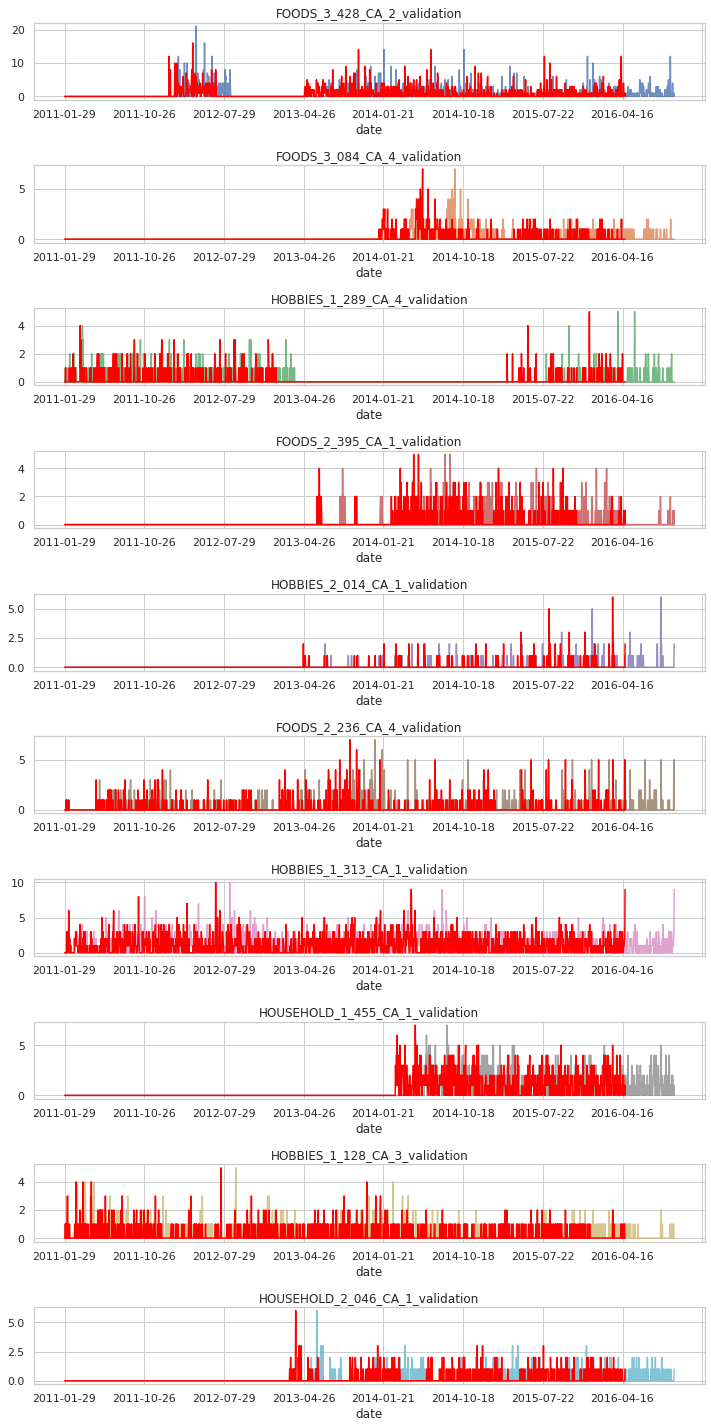

In [24]:
fig, axs = plt.subplots(10,1,figsize=(10, 20))
#axs = axs.flatten()

axs_id=0
for item in sample_ca_id:
    sample_california[item].plot(title=item,  color=next(color_cycle), alpha=0.8, ax=axs[axs_id])
    sample_california[sample_california.event_name_1 == 'Day2Day'][item].plot(title=item, color='red', ax=axs[axs_id])
    #sample_california[item].plot.bar(x='event_name_1')
    #axs[axs_id].bar(sample_california['event_name_1'], height=5)
    axs_id+=1
plt.tight_layout()
plt.show()

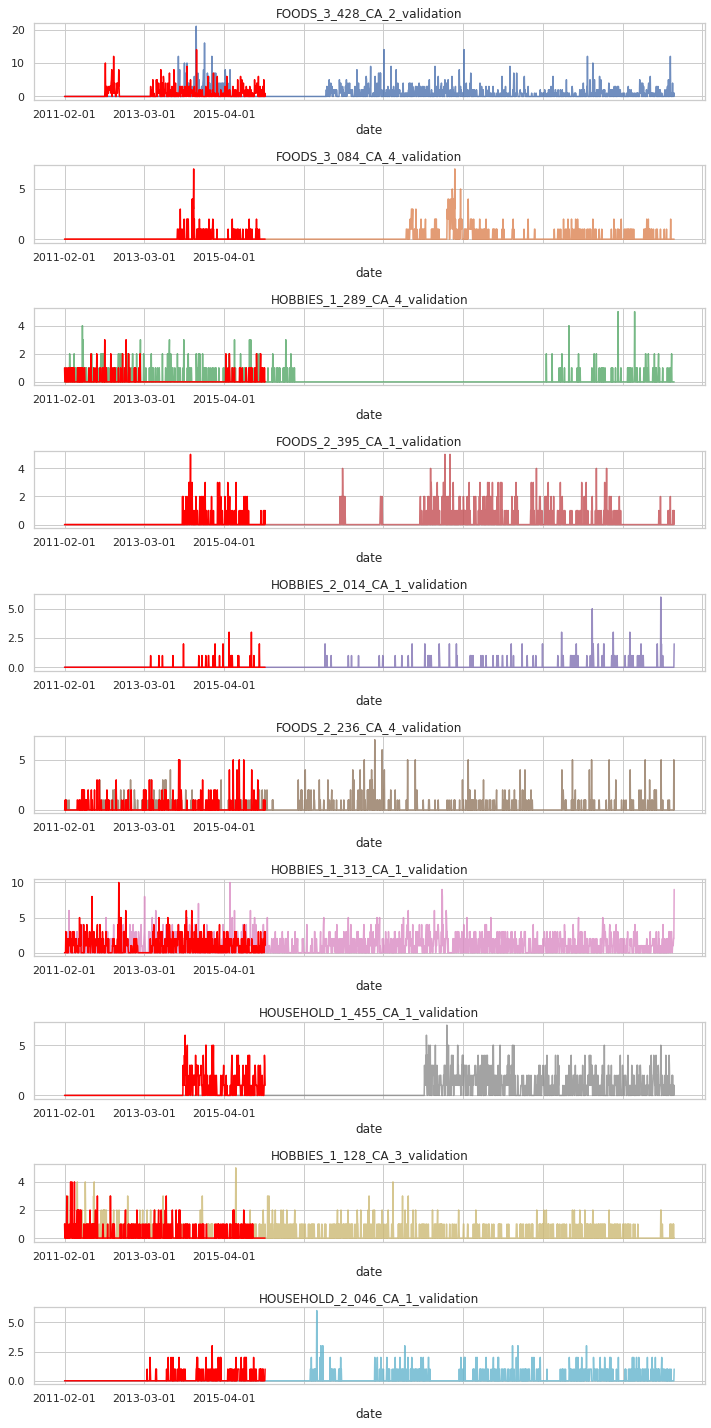

In [25]:
fig, axs = plt.subplots(10,1,figsize=(10, 20))
#axs = axs.flatten()

axs_id=0
for item in sample_ca_id:
    sample_california[item].plot(title=item,  color=next(color_cycle), alpha=0.8, ax=axs[axs_id])
    sample_california[sample_california.snap_CA == 1][item].plot(title=item, color='red', ax=axs[axs_id])
    axs_id+=1
plt.tight_layout()
plt.show()

## Texas

In [26]:
sample_texas, sample_tx_id = get_sample_dataframe('TX', 10)
sample_texas.head()

Category Counts : {'FOODS': 0.4, 'HOUSEHOLD': 0.4, 'HOBBIES': 0.2}


,FOODS_2_136_TX_1_validation,HOUSEHOLD_1_364_TX_3_validation,HOUSEHOLD_1_151_TX_1_validation,HOBBIES_1_403_TX_2_validation,HOUSEHOLD_1_435_TX_3_validation,HOBBIES_2_110_TX_2_validation,FOODS_3_025_TX_3_validation,FOODS_1_079_TX_2_validation,HOUSEHOLD_2_094_TX_2_validation,FOODS_3_140_TX_3_validation,event_name_1,snap_TX
date,,,,,,,,,,,,
2011-01-29,0,0,0,0,0,0,0,0,0,0,Day2Day,0
2011-01-30,0,0,0,0,0,0,0,0,0,0,Day2Day,0
2011-01-31,2,0,0,0,0,0,0,0,0,0,Day2Day,0
2011-02-01,0,0,0,0,0,0,0,0,0,0,Day2Day,1
2011-02-02,0,0,0,0,0,0,0,0,0,0,Day2Day,0


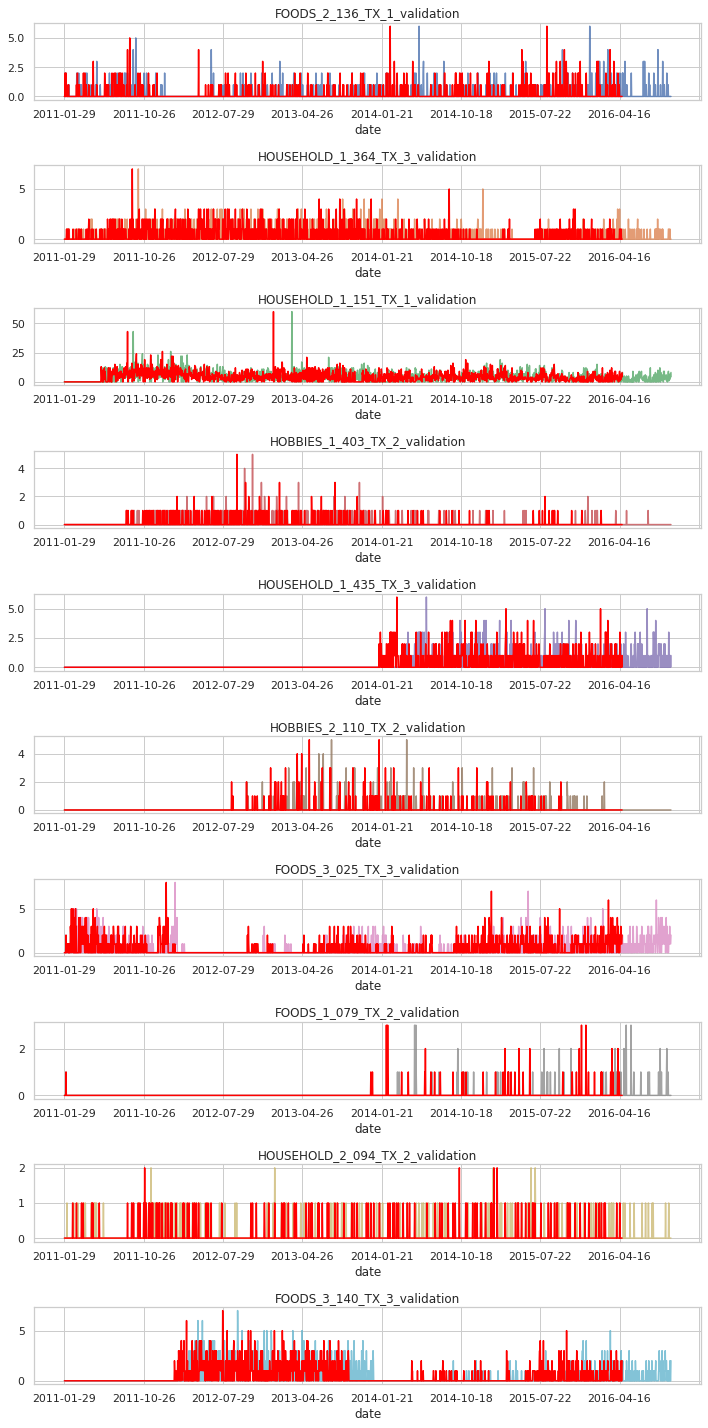

In [27]:
fig, axs = plt.subplots(10,1,figsize=(10, 20))
#axs = axs.flatten()

axs_id=0
for item in sample_tx_id:
    sample_texas[item].plot(title=item,  color=next(color_cycle), alpha=0.8, ax=axs[axs_id])
    sample_texas[sample_texas.event_name_1 == 'Day2Day'][item].plot(title=item, color='red', ax=axs[axs_id])
    #sample_california[item].plot.bar(x='event_name_1')
    #axs[axs_id].bar(sample_california['event_name_1'], height=5)
    axs_id+=1
plt.tight_layout()
plt.show()

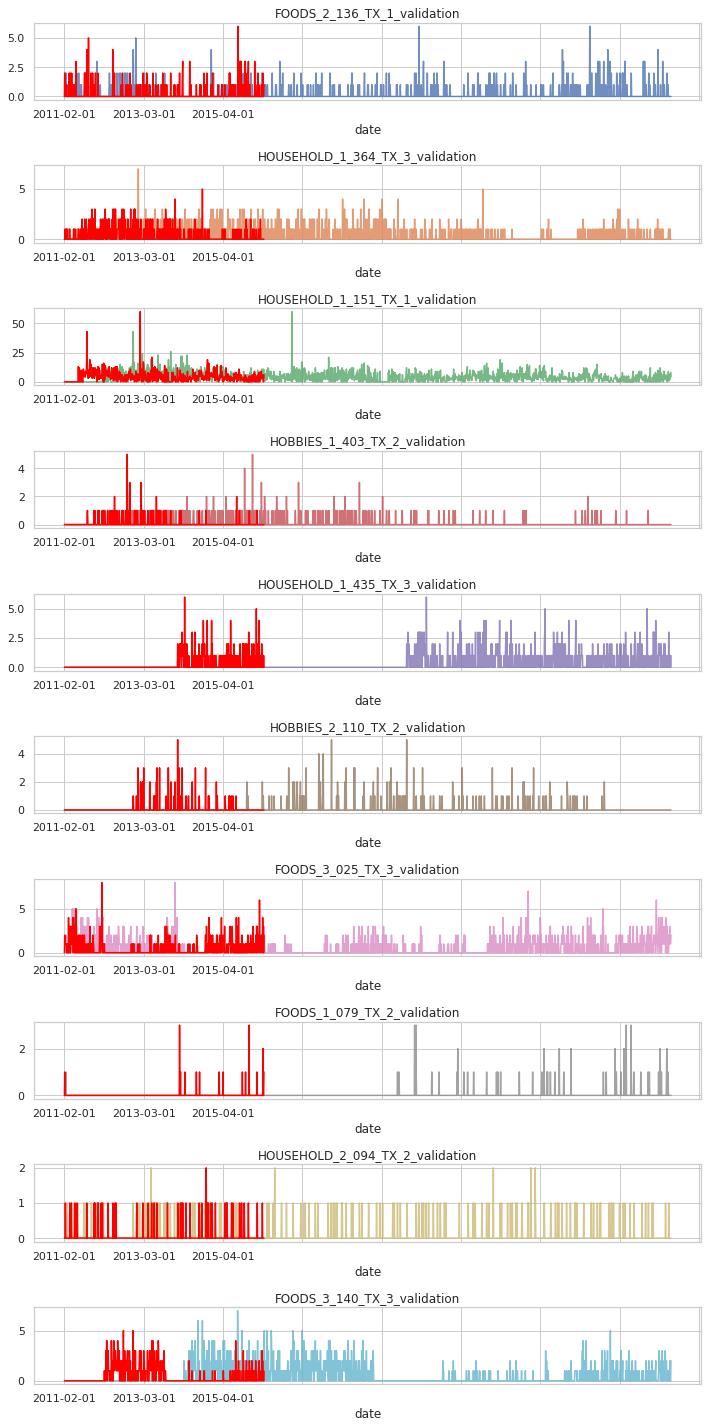

In [28]:
fig, axs = plt.subplots(10,1,figsize=(10, 20))
#axs = axs.flatten()

axs_id=0
for item in sample_tx_id:
    sample_texas[item].plot(title=item,  color=next(color_cycle), alpha=0.8, ax=axs[axs_id])
    sample_texas[sample_texas.snap_TX == 1][item].plot(title=item, color='red', ax=axs[axs_id])
    axs_id+=1
plt.tight_layout()
plt.show()

## Wisconsin

In [29]:
sample_wisconsin, sample_wi_id = get_sample_dataframe('WI', 10)
sample_wisconsin.head()

Category Counts : {'FOODS': 0.4, 'HOUSEHOLD': 0.4, 'HOBBIES': 0.2}


,FOODS_2_136_WI_1_validation,HOUSEHOLD_1_364_WI_3_validation,HOUSEHOLD_1_151_WI_1_validation,HOBBIES_1_403_WI_2_validation,HOUSEHOLD_1_435_WI_3_validation,HOBBIES_2_110_WI_2_validation,FOODS_3_025_WI_3_validation,FOODS_1_079_WI_2_validation,HOUSEHOLD_2_094_WI_2_validation,FOODS_3_140_WI_3_validation,event_name_1,snap_WI
date,,,,,,,,,,,,
2011-01-29,0,0,0,1,0,0,0,0,0,0,Day2Day,0
2011-01-30,0,0,0,0,0,0,1,0,0,0,Day2Day,0
2011-01-31,0,0,0,0,0,0,2,0,0,0,Day2Day,0
2011-02-01,0,0,0,1,0,0,0,0,0,0,Day2Day,0
2011-02-02,0,0,0,0,0,0,0,0,0,0,Day2Day,1


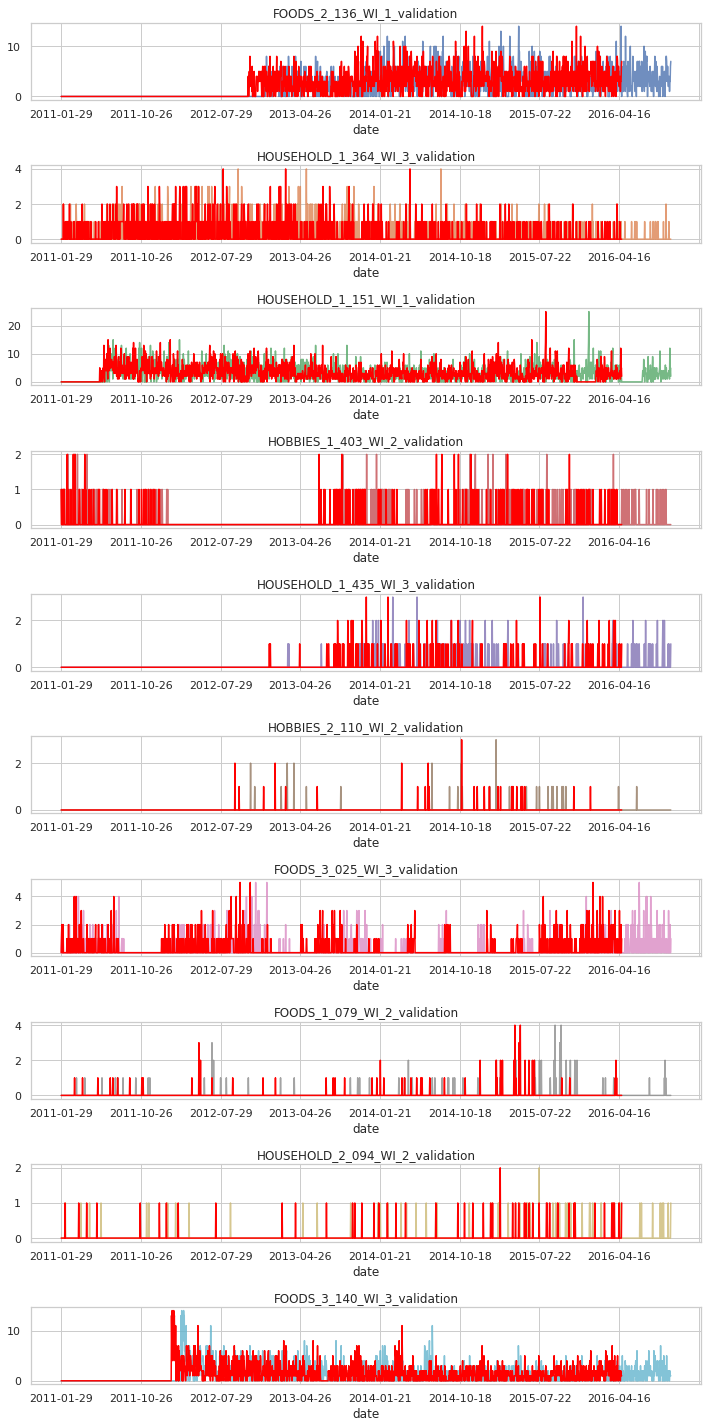

In [30]:
fig, axs = plt.subplots(10,1,figsize=(10, 20))
#axs = axs.flatten()

axs_id=0
for item in sample_wi_id:
    sample_wisconsin[item].plot(title=item,  color=next(color_cycle), alpha=0.8, ax=axs[axs_id])
    sample_wisconsin[sample_wisconsin.event_name_1 == 'Day2Day'][item].plot(title=item, color='red', ax=axs[axs_id])
    #sample_california[item].plot.bar(x='event_name_1')
    #axs[axs_id].bar(sample_california['event_name_1'], height=5)
    axs_id+=1
plt.tight_layout()
plt.show()

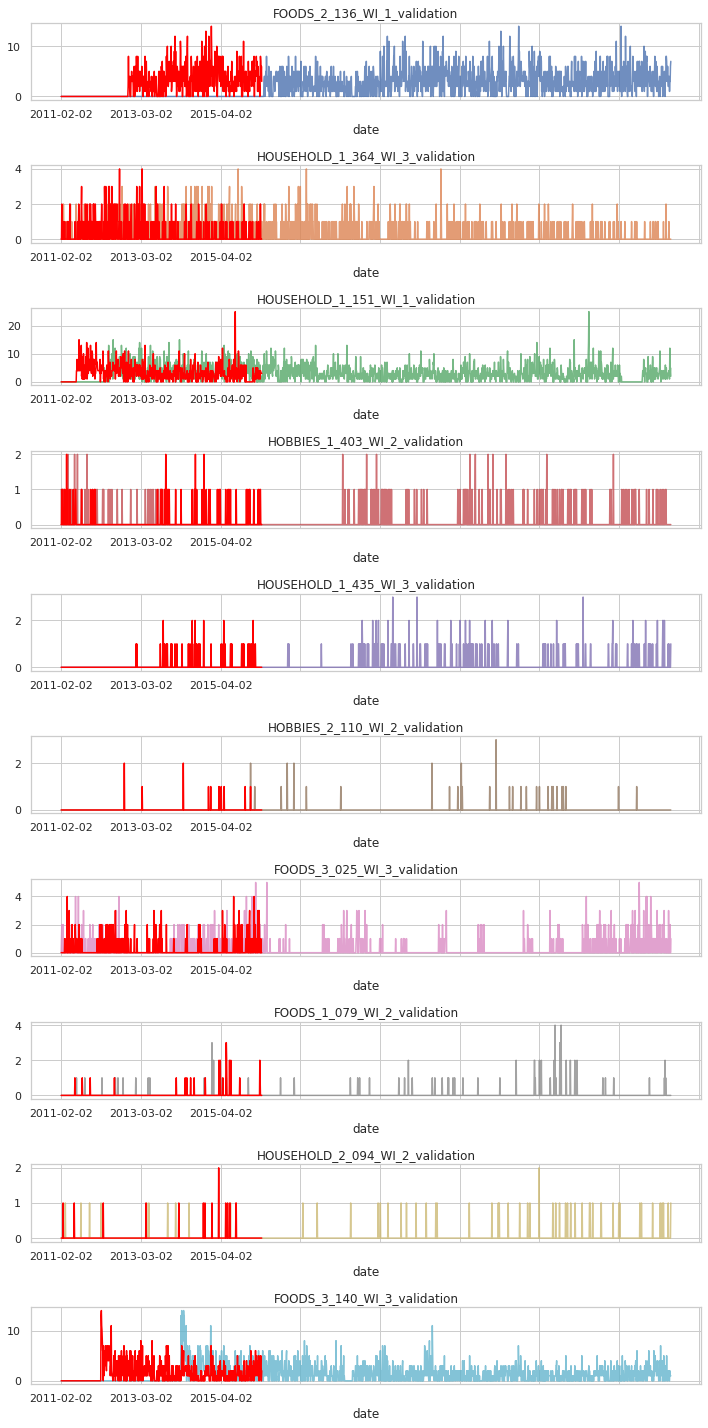

In [31]:
fig, axs = plt.subplots(10,1,figsize=(10, 20))
#axs = axs.flatten()

axs_id=0
for item in sample_wi_id:
    sample_wisconsin[item].plot(title=item,  color=next(color_cycle), alpha=0.8, ax=axs[axs_id])
    sample_wisconsin[sample_wisconsin.snap_WI == 1][item].plot(title=item, color='red', ax=axs[axs_id])
    axs_id+=1
plt.tight_layout()
plt.show()

# Aggregate Category Wise Item Sold

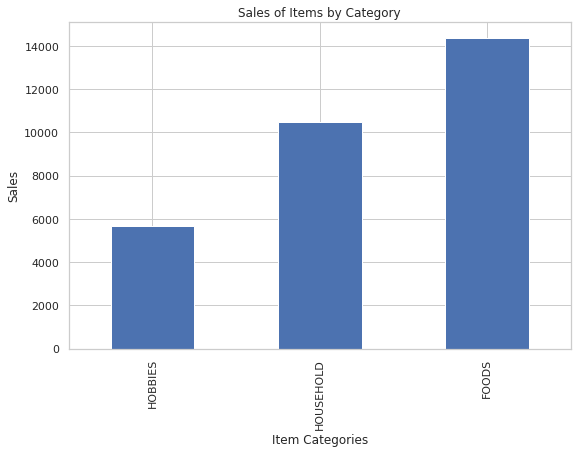

In [32]:
df_sales_tv.groupby('cat_id').count()['id'].sort_values().plot(kind='bar', title='Sales of Items by Category', figsize=(9,6))
plt.xlabel('Item Categories')
plt.ylabel('Sales')
plt.show()

# Date Wise Items Sold (Per Category)

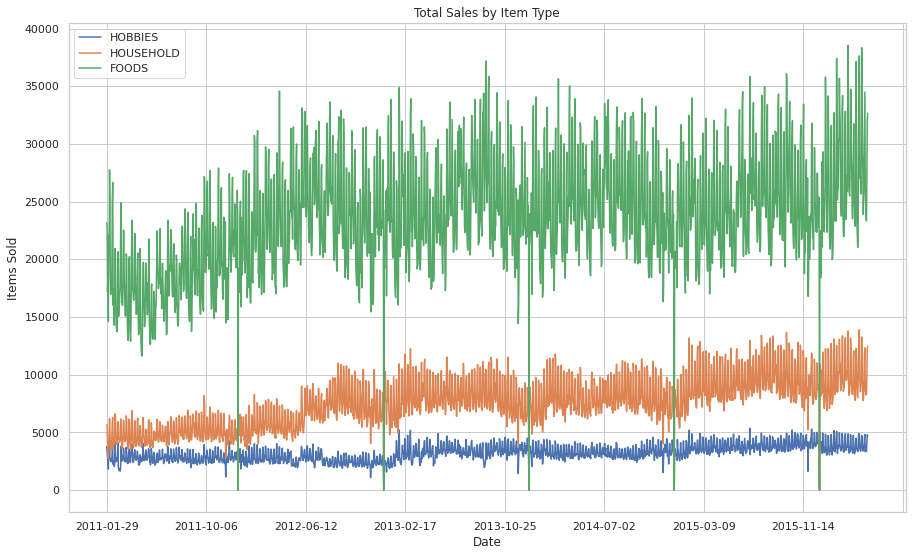

In [33]:
sales_item = df_sales_tv.set_index('id')[d_cols].T \
.merge(df_calendar.set_index('d')['date'], left_index=True, right_index=True).set_index('date')

for i in df_sales_tv['cat_id'].unique():
    items_col = [c for c in sales_item.columns if i in c]
    sales_item[items_col].sum(axis=1).plot(figsize=(15,9), title='Total Sales by Item Type')

plt.legend(df_sales_tv['cat_id'].unique())
plt.ylabel('Items Sold')
plt.xlabel('Date')
plt.show()

# Rolling 3 Months Mean Sale acorss each store (Aggregate)

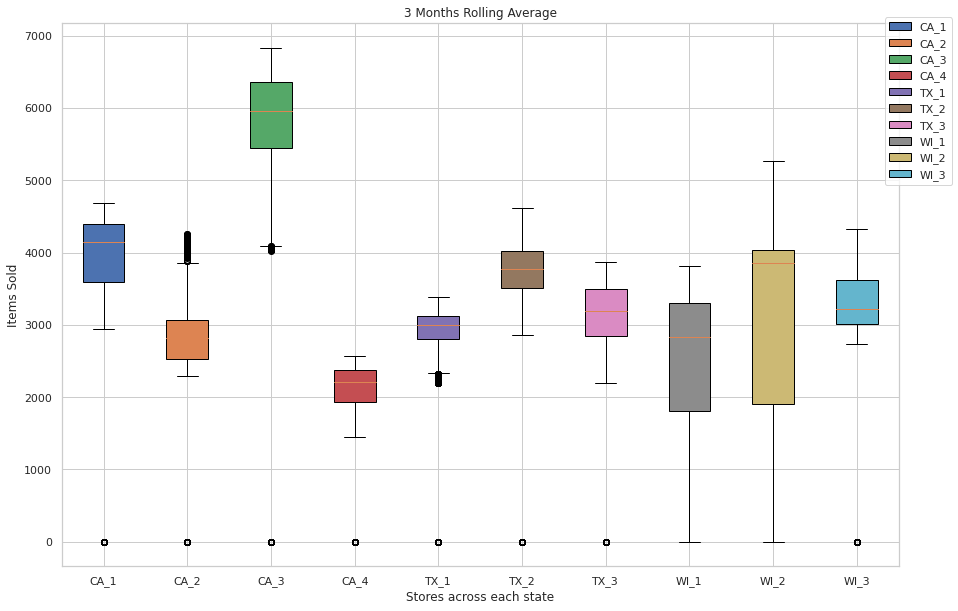

In [34]:
rolling_data = []
store_list = df_sell_price.store_id.unique()

for s in store_list:
    store_items = [c for c in sales_item.columns if s in c]
    data = sales_item[store_items].sum(axis=1).rolling(90).mean()
    rolling_data.append(np.nan_to_num(np.array(data)))


plt.figure(figsize=(15,10)) 
bplot = plt.boxplot(rolling_data, labels=store_list, patch_artist=True, manage_ticks=True)

# fill boxplots with colors
colors = [next(color_cycle) for i in range(0,len(store_list))]
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)   

plt.xlabel('Stores across each state')
plt.ylabel('Items Sold')
plt.title('3 Months Rolling Average')
plt.legend(bplot['boxes'],store_list, bbox_to_anchor=(1.07,1.02))
plt.show()


# Average Items Sold across each store

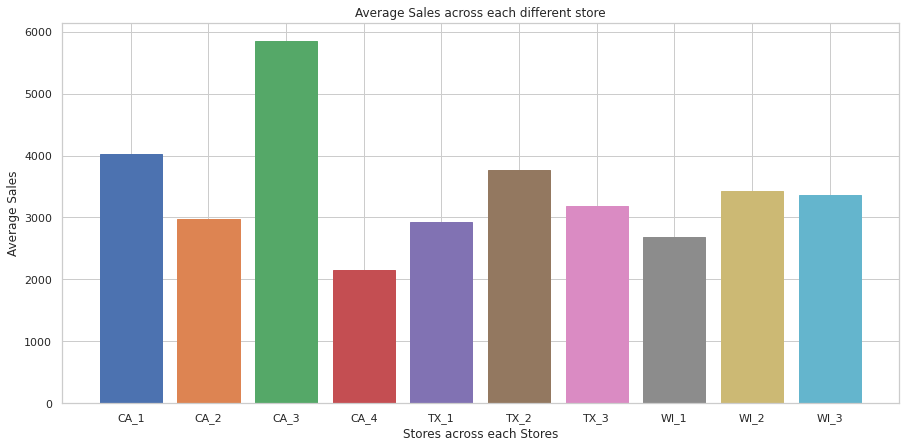

In [35]:
mean_store = []
for s in store_list:
    store_items = [c for c in sales_item if s in c]
    mean_store.append(np.mean(sales_item[store_items].sum(axis=1)))

plt.figure(figsize=(15,7))
bplot = plt.bar(store_list, mean_store)

#fill different colors for bar plot
colors = [next(color_cycle) for i in range(0,len(store_list))]
for i, b in enumerate(bplot):
    b.set_color(colors[i])
    
plt.xlabel('Stores across each Stores')
plt.ylabel('Average Sales')
plt.title('Average Sales across each different store')
plt.show()

## 7 Day Rolling Mean across each store with Date

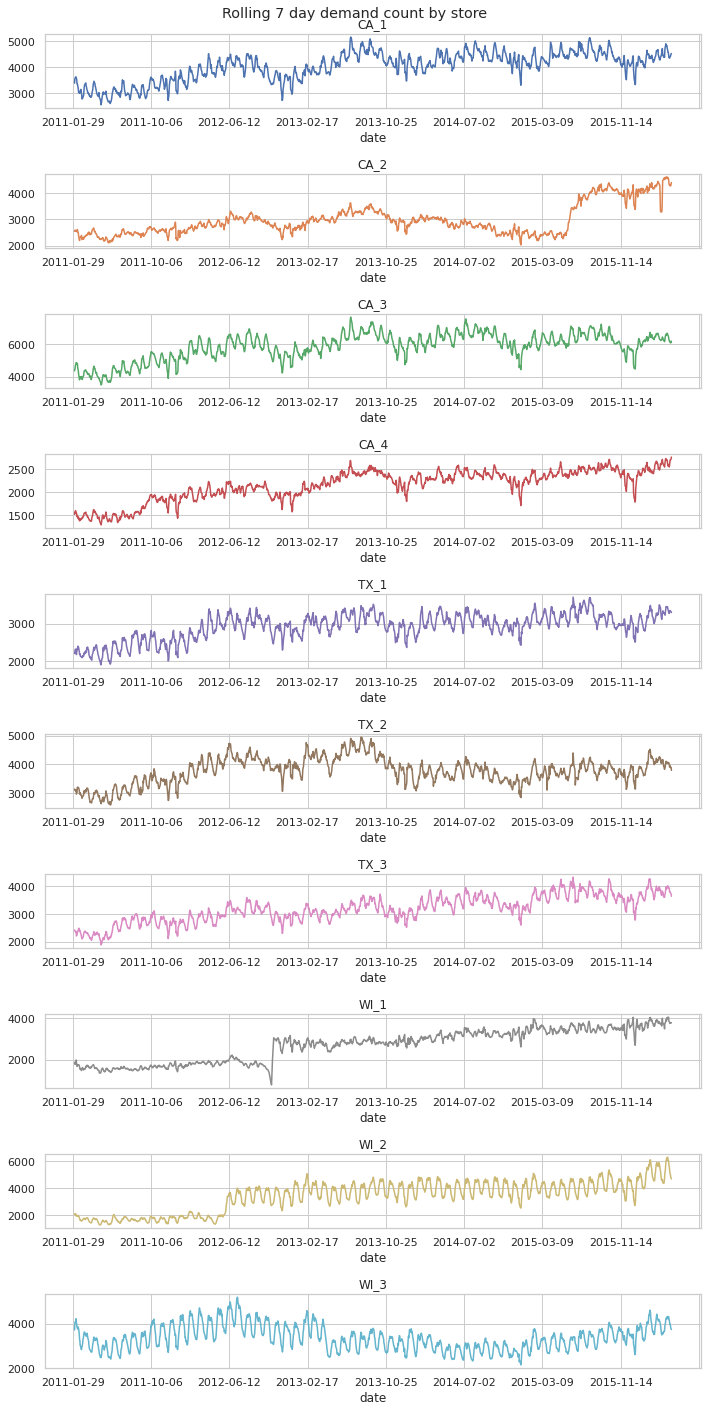

In [36]:
fig, axs = plt.subplots(10,1,figsize=(10,20))
ax_id=0

for i in df_sell_price['store_id'].unique():
    store_items = [c for c in sales_item.columns if i in c]
    sales_item[store_items].sum(axis=1) \
    .rolling(7).mean() \
    .plot(title=i, color=next(color_cycle), ax=axs[ax_id])
    
    ax_id+=1

plt.suptitle('Rolling 7 day demand count by store')
plt.tight_layout()
plt.show()


## Sales Relationship with Day of Week

Text(0.5, 1.0, 'Store Wise Items Sold on Each Day of Week')

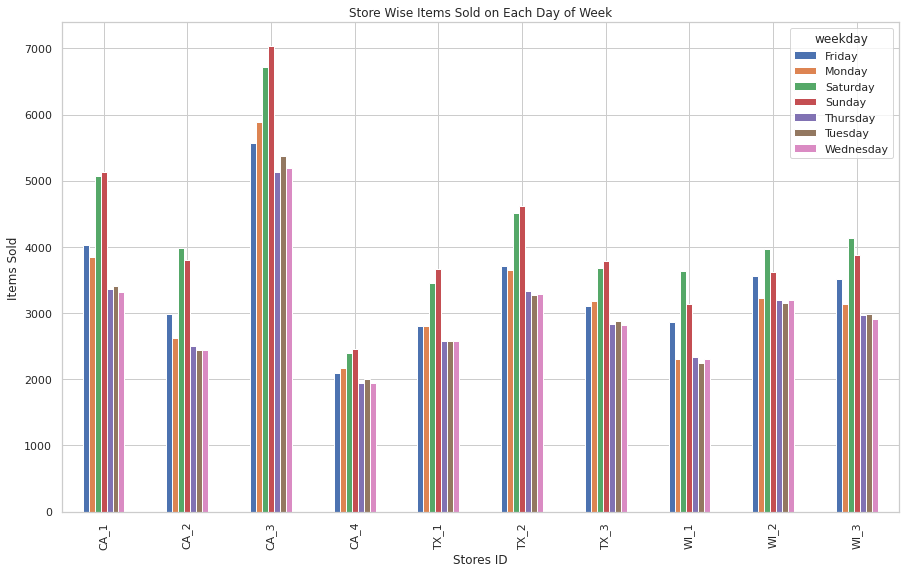

In [37]:
df_sales_tv.groupby('store_id').sum().T \
.merge(df_calendar.set_index('d'), left_index=True, right_index=True).set_index('date').groupby('weekday').mean()[df_sell_price['store_id'].unique()].T.plot(kind='bar')

plt.xlabel('Stores ID')
plt.ylabel('Items Sold')
plt.title('Store Wise Items Sold on Each Day of Week')

## Price Distribution across Different Categores (Aggregated over each store)

In [38]:
df_sell_price['item_category'] = df_sell_price['item_id'].apply(lambda x: x.split('_')[0])

In [39]:
df_sell_price.sell_price.max()

107.32

In [40]:
df_sell_price.sell_price.min()

0.01

In [41]:
group_1 = df_sell_price.groupby('item_category')

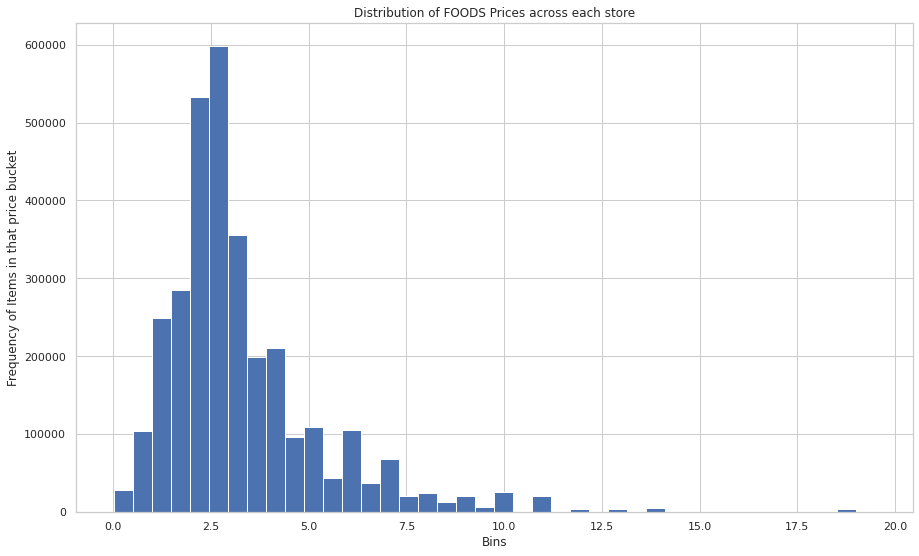

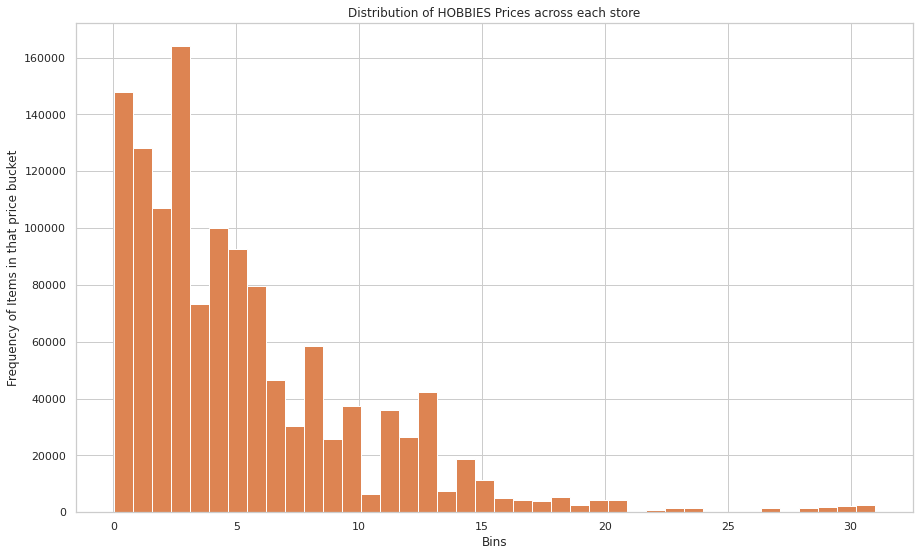

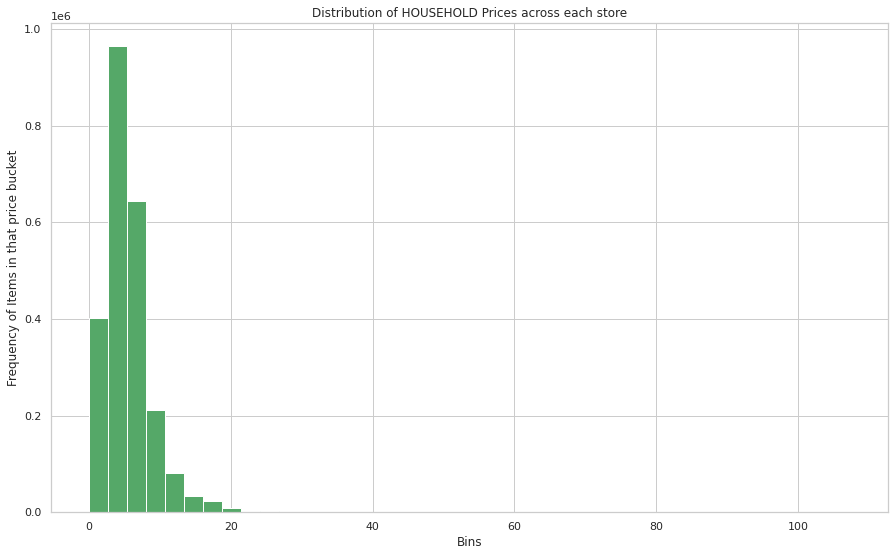

In [42]:
for cat, data in group_1:
    plt.figure()
    data['sell_price'].plot(kind='hist', bins=40, color=next(color_cycle))
    plt.title(f'Distribution of {cat} Prices across each store')
    plt.xlabel('Bins')
    plt.ylabel('Frequency of Items in that price bucket')